In [38]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
titanic_df = pd.read_csv('./Resources/Titanic CSV.csv')

# Display the first 5 rows
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Drop the "Name" column
titanic_df = titanic_df.drop(columns=['Name'])
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Fare Group
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,None,S,Adult,Low Fare
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Medium Fare
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,Adult,Low Fare
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Adult,Medium Fare
4,5,0,3,male,35.0,0,0,373450,8.0500,None,S,Adult,Low Fare


In [2]:
# Show the number of passengers and survivors by sex, then add a new column called "Total Died"
passengers_by_sex = titanic_df.groupby('Sex').agg(
    Total_Passengers=('PassengerId', 'size'),
    Total_Survivors=('Survived', 'sum')
).reset_index()

# Add the 'Total Died' column
passengers_by_sex['Total Died'] = passengers_by_sex['Total_Passengers'] - passengers_by_sex['Total_Survivors']
passengers_by_sex


,Sex,Total_Passengers,Total_Survivors,Total Died
0,female,314,233,81
1,male,577,109,468


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


C:\Users\joe\AppData\Local\Temp\ipykernel_33452\2978871252.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Survived', y='Age', data=titanic_df, palette='coolwarm')


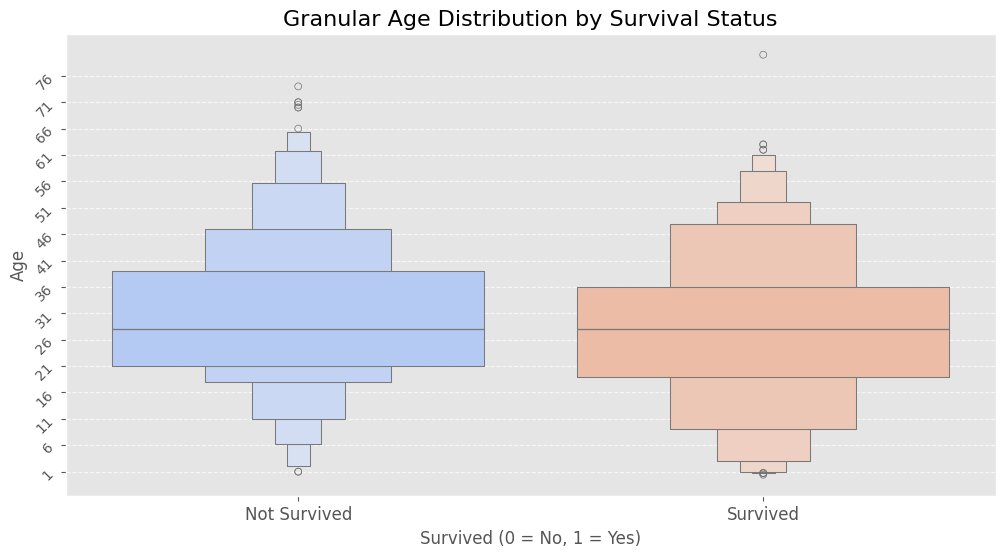

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
titanic_df = pd.read_csv('./Resources/Titanic CSV.csv')

# Display the first few rows of the dataset
print(titanic_df.head())

# Create the boxenplot
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Survived', y='Age', data=titanic_df, palette='coolwarm')

# Customize the plot
plt.title('Granular Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], ['Not Survived', 'Survived'], fontsize=12)

# Adjust age axis labels for readability
# Show every 5 years, rotated for clarity
plt.yticks(range(1, 81, 5), fontsize=10, rotation=45)  

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Total Male: 577
Total Female: 314
Male % Survived: 18.89%
Female % Survived: 74.2%
Male % Died: 81.11%
Female % Died: 25.8%


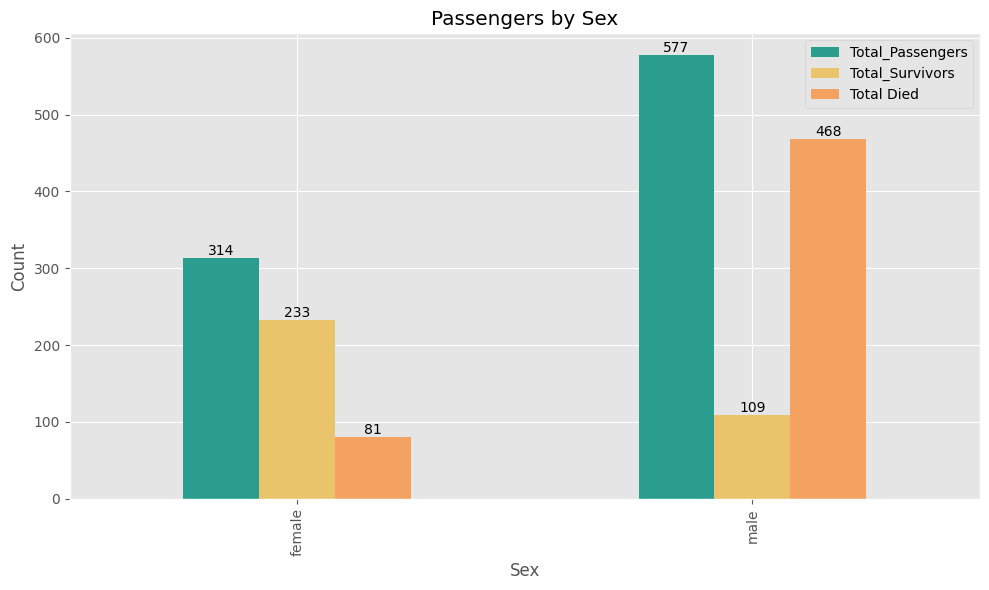

In [67]:
# Plot the passengers_by_sex DataFrame
plt.figure(figsize=(10, 6))
ax = passengers_by_sex.plot(
    x='Sex', 
    y=['Total_Passengers', 'Total_Survivors', 'Total Died'], 
    kind='bar', 
    ax=plt.gca(), 
    color=['#2a9d8f', '#e9c46a', '#f4a261']  # Professional colors: teal, gold, and coral
)
plt.title('Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Calculate percentages
passengers_by_sex['% Survived'] = (passengers_by_sex['Total_Survivors'] / passengers_by_sex['Total_Passengers'] * 100).round(2)
passengers_by_sex['% Died'] = (100 - passengers_by_sex['% Survived']).round(2)

# Add totals at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Print the custom legend labels above the graph
print("\n".join(custom_legend_labels))


# Tighten the layout for better visibility
plt.tight_layout()

plt.show()


In [3]:
# Show the number of passengers and survivors by class, add a new column called "Total Died"
passengers_by_class = titanic_df.groupby('Pclass').agg(
    Total_Passengers=('PassengerId', 'size'),
    Total_Survivors=('Survived', 'sum')
).reset_index()

# Rename columns for clarity
passengers_by_class.columns = ['Passenger Class', 'Total Passengers', 'Total Survivors']

# Map passenger class numbers to names
passengers_by_class['Passenger Class'] = passengers_by_class['Passenger Class'].map({1: 'First', 2: 'Second', 3: 'Third'})

# Add the 'Total Died' column
passengers_by_class['Total Died'] = passengers_by_class['Total Passengers'] - passengers_by_class['Total Survivors']

passengers_by_class

,Passenger Class,Total Passengers,Total Survivors,Total Died
0,First,216,136,80
1,Second,184,87,97
2,Third,491,119,372


In [4]:
# Show the number of passengers and survivors by age group, add a new column for "Total Died"
def age_group(age):
    if age < 18:
        return 'Child'
    else:
        return 'Adult'
    
titanic_df['Age Group'] = titanic_df['Age'].apply(age_group)
age_group_stats = titanic_df.groupby('Age Group').agg(
    Total_Passengers=('PassengerId', 'size'),
    Total_Survivors=('Survived', 'sum')
).reset_index()

# Ensure column names are correctly assigned
age_group_stats.columns = ['Age Group', 'Total Passengers', 'Total Survivors']

# Add the 'Total Died' column
age_group_stats['Total Died'] = age_group_stats['Total Passengers'] - age_group_stats['Total Survivors']
age_group_stats


,Age Group,Total Passengers,Total Survivors,Total Died
0,Adult,778,281,497
1,Child,113,61,52


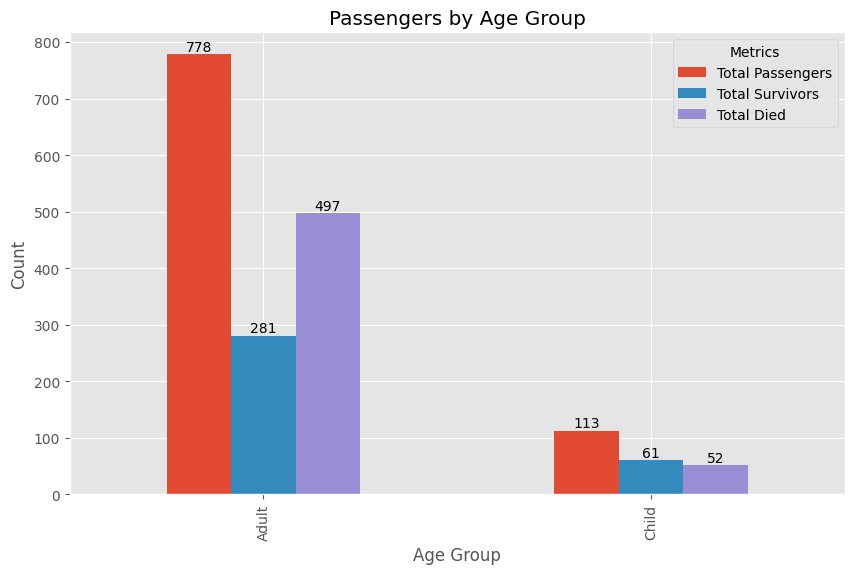

In [45]:
# Plot the age_group_stats DataFrame
plt.figure(figsize=(10, 6))
ax = age_group_stats.plot(x='Age Group', y=['Total Passengers', 'Total Survivors', 'Total Died'], kind='bar', ax=plt.gca())
plt.title('Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Metrics')

# Add totals at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

In [5]:
# Show the number of passengers and survivors by fare group, add a new column for "Total Died"
def fare_group(fare):
    if fare < 50:
        return 'Low Fare'
    elif fare < 100:
        return 'Medium Fare'
    else:
        return 'High Fare'
    
titanic_df['Fare Group'] = titanic_df['Fare'].apply(fare_group)
fare_group_stats = titanic_df.groupby('Fare Group').agg(
    Total_Passengers=('PassengerId', 'size'),
    Total_Survivors=('Survived', 'sum')
).reset_index()
fare_group_stats.columns = ['Fare Group', 'Total Passengers', 'Total Survivors']
fare_group_stats['Total Died'] = fare_group_stats['Total Passengers'] - fare_group_stats['Total Survivors']
fare_group_stats

,Fare Group,Total Passengers,Total Survivors,Total Died
0,High Fare,53,39,14
1,Low Fare,730,233,497
2,Medium Fare,108,70,38


In [6]:
# Show the number of passengers and survivors by embarked location, add a new column for "Total Died"
embarked_stats = titanic_df.groupby('Embarked').agg(
    Total_Passengers=('PassengerId', 'size'),
    Total_Survivors=('Survived', 'sum')
).reset_index()
embarked_stats.columns = ['Embarked', 'Total Passengers', 'Total Survivors']
embarked_stats['Total Died'] = embarked_stats['Total Passengers'] - embarked_stats['Total Survivors']
embarked_stats['Embarked'] = embarked_stats['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
embarked_stats

,Embarked,Total Passengers,Total Survivors,Total Died
0,Cherbourg,168,93,75
1,Queenstown,77,30,47
2,Southampton,644,217,427


In [7]:
# Show the number of passengers and survivors by cabin, add a new column for "Total Died"
cabin_stats = titanic_df.groupby('Cabin').agg(
    Total_Passengers=('PassengerId', 'size'),
    Total_Survivors=('Survived', 'sum')
).reset_index()
cabin_stats.columns = ['Cabin', 'Total Passengers', 'Total Survivors']
cabin_stats['Total Died'] = cabin_stats['Total Passengers'] - cabin_stats['Total Survivors']
cabin_stats['Cabin'] = cabin_stats['Cabin'].fillna('Unknown')
cabin_stats = cabin_stats[cabin_stats['Cabin'] != 'Unknown']  # Filter out unknown cabins
cabin_stats.head(10)

,Cabin,Total Passengers,Total Survivors,Total Died
0,A10,1,0,1
1,A14,1,0,1
2,A16,1,1,0
3,A19,1,0,1
4,A20,1,1,0
5,A23,1,1,0
6,A24,1,0,1
7,A26,1,1,0
8,A31,1,1,0
9,A32,1,0,1


In [37]:
# Save the dataframes to CSV files
passengers_by_sex.to_csv('./Resources/Passengers_By_Sex.csv', index=False)
passengers_by_class.to_csv('./Resources/Passengers_By_Class.csv', index=False)
age_group_stats.to_csv('./Resources/Age_Group_Stats.csv', index=False)
fare_group_stats.to_csv('./Resources/Fare_Group_Stats.csv', index=False)
embarked_stats.to_csv('./Resources/Embarked_Stats.csv', index=False)
cabin_stats.to_csv('./Resources/Cabin_Stats.csv', index=False)



Database Creation

In [9]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func



In [11]:
 # Create an engine to connect to the SQLite database
engine = create_engine('sqlite:///titanic.db')
# Create a session to interact with the database
session = Session(engine)
# Reflect the database schema to create ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)

C:\Users\joe\AppData\Local\Temp\ipykernel_33452\1510899977.py:7: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [18]:
# Create a new table in the database for Age Group Stats
age_group_stats.to_sql('age_group_stats', con=engine, if_exists='replace', index=False)
# Create a new table in the database for Fare Group Stats
fare_group_stats.to_sql('fare_group_stats', con=engine, if_exists='replace', index=False)
# Create a new table in the database for Cabin Stats
cabin_stats.to_sql('cabin_stats', con=engine, if_exists='replace', index=False)
# Create a new table in the database for Embarked Stats
embarked_stats.to_sql('embarked_stats', con=engine, if_exists='replace', index=False)
# Create a new table in the database for Passengers by Class
passengers_by_class.to_sql('passengers_by_class', con=engine, if_exists='replace', index=False)
# Create a new table in the database for Passengers by Sex
passengers_by_sex.to_sql('passengers_by_sex', con=engine, if_exists='replace', index=False)
# Create a new table in the database for Titanic Data
titanic_df.to_sql('titanic', con=engine, if_exists='replace', index=False)

# Commit the session to save changes to the database
session.commit()


In [19]:
#Inspect the database to see the tables and their columns
inspector = inspect(engine)
tables = inspector.get_table_names()
print("Tables in the database:", tables)

Tables in the database: ['age_group_stats', 'cabin_stats', 'embarked_stats', 'fare_group_stats', 'passengers_by_class', 'passengers_by_sex', 'titanic']


In [33]:
# Load data into the tables
age_group_stats = pd.read_sql_table('age_group_stats', con=engine)
fare_group_stats = pd.read_sql_table('fare_group_stats', con=engine)
cabin_stats = pd.read_sql_table('cabin_stats', con=engine)
embarked_stats = pd.read_sql_table('embarked_stats', con=engine)
passengers_by_class = pd.read_sql_table('passengers_by_class', con=engine)
passengers_by_sex = pd.read_sql_table('passengers_by_sex', con=engine)



In [22]:
# Query age_group_stats table to get the number of passengers and survivors by age group
age_group_query = text("SELECT * FROM age_group_stats")
age_group_results = session.execute(age_group_query)
age_group_df = pd.DataFrame(age_group_results.fetchall(), columns=age_group_results.keys())
age_group_df.head()

,Age Group,Total Passengers,Total Survivors,Total Died
0,Adult,778,281,497
1,Child,113,61,52


In [23]:
# Query fare_group_stats table to get the number of passengers and survivors by fare group
fare_group_query = text("SELECT * FROM fare_group_stats")
fare_group_results = session.execute(fare_group_query)
fare_group_df = pd.DataFrame(fare_group_results.fetchall(), columns=fare_group_results.keys())
fare_group_df.head()

,Fare Group,Total Passengers,Total Survivors,Total Died
0,High Fare,53,39,14
1,Low Fare,730,233,497
2,Medium Fare,108,70,38


In [27]:
# Query titanic table and select all columns other than Name
titanic_query = text("SELECT PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked FROM titanic")
titanic_results = session.execute(titanic_query)
titanic_df = pd.DataFrame(titanic_results.fetchall(), columns=titanic_results.keys())
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,None,S


In [ ]:
# Commit and close connection
# conn.commit()
# conn.close()


Additional Library Not Learned in Class

In [ ]:
#Replace sklearn with either charts/graphs / bottle / fast api